# METEOROLOGICAL DATA PRESENTATION
## Numerical and Graphical Summaries

This notebook presents a comprehensive exploratory analysis of the meteorological dataset with detailed numerical and graphical summaries.


### 1. DATASET INTRODUCTION

In this section, we will study the dataset, the different categories, the size of the dataset, etc.


In [38]:
# Data loading
data_weather <- read.table("data/donnees-synop-essentielles-omm.csv",
                        header=TRUE,
                        sep=";",
                        quote = "\"")


In [39]:
# General dataset overview
head(data_weather)
dim(data_weather)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


[1] 1719567      82

**Main observations:**
- Large dataset size: dataframe with 82 variables and 1,719,567 observations


In [40]:
# Display of variable labels
names_df <- data.frame(
    index = seq_along(colnames(data_weather)),
    name = colnames(data_weather)
)
print(names_df)

   index                                                      name
1      1                                            ID.OMM.station
2      2                                                      Date
3      3                                    Pression.au.niveau.mer
4      4                         Variation.de.pression.en.3.heures
5      5                             Type.de.tendance.barométrique
6      6                             Direction.du.vent.moyen.10.mn
7      7                               Vitesse.du.vent.moyen.10.mn
8      8                                               Température
9      9                                            Point.de.rosée
10    10                                                  Humidité
11    11                                    Visibilité.horizontale
12    12                                             Temps.présent
13    13                                             Temps.passé.1
14    14                                             Temps.pas

**Variable description:**
We have various variables providing a lot of information about the weather at a given station. Some columns may not be significant for further analysis, we will work on reducing the dataset to improve visibility and comprehension of the data


### 2. EXTRACTION OF SIMILAR DATA GROUPS

We notice that there are different topics in the dataset, we have temperature, pressure, wind, precipitation, etc...

We will create separate datasets to analyze the data by topics. Analyzing the dataset in its globality may be complex to understand due to the high number of columns.


### Temperature dataset

In [41]:
# Selection of temperature-related values (first in Kelvin, second in Celsius)
temperature_data <- data_weather[,c(1:2, 8, 25:29)] 
temperature_data_C <- data_weather[,c(1:2, 65:70)] 

# Sort by ascending date
temperature_data <- temperature_data[order(temperature_data$Date), ]
temperature_data_C <- temperature_data_C[order(temperature_data_C$Date), ]

# Reorganize the index
rownames(temperature_data) <- NULL
rownames(temperature_data_C) <- NULL
head(temperature_data)
head(temperature_data_C)


,ID.OMM.station,Date,Température,Température.minimale.sur.12.heures,Température.minimale.sur.24.heures,Température.maximale.sur.12.heures,Température.maximale.sur.24.heures,Température.minimale.du.sol.sur.12.heures
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,294.85,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,295.15,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,288.85,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,292.85,NA,NA,NA,NA,291.55
5,81415,2015-08-04T02:00:00+02:00,297.55,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,286.35,NA,NA,NA,NA,282.85


,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,22.0,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,15.7,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,19.7,NA,NA,NA,NA,18.4
5,81415,2015-08-04T02:00:00+02:00,24.4,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,13.2,NA,NA,NA,NA,9.7


In [ ]:
# Visualization of missing data for temperature variables (with column numbers)
library(visdat)
library(ggplot2)
col_numbers <- seq_along(colnames(temperature_data))
colnames(temperature_data) <- as.character(col_numbers)
vis_dat(
  temperature_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )

**Correspondence between column number and variable name for `temperature_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Température`    |
| 4             | `Température.minimale.sur.12.heures` |
| 5             | `Température.minimale.sur.24.heures` |
| 6             | `Température.maximale.sur.12.heures` |
| 7             | `Température.maximale.sur.24.heures` |


### Pressure dataset

In [ ]:
# Selection of pressure-related values
pressure_data <- data_weather[, c(1:5, 21:22)]

# Sort by ascending date
pressure_data <- pressure_data[order(pressure_data$Date), ]

# Reorganize the index
row.names(pressure_data) <- NULL
head(pressure_data)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,101570,30,1,101430,NA
2,7761,2015-08-04T02:00:00+02:00,101600,50,0,101500,NA
3,7020,2015-08-04T02:00:00+02:00,101390,-10,7,101130,NA
4,7240,2015-08-04T02:00:00+02:00,101410,130,3,100110,NA
5,81415,2015-08-04T02:00:00+02:00,101370,270,3,100160,NA
6,7110,2015-08-04T02:00:00+02:00,101490,40,1,100350,NA


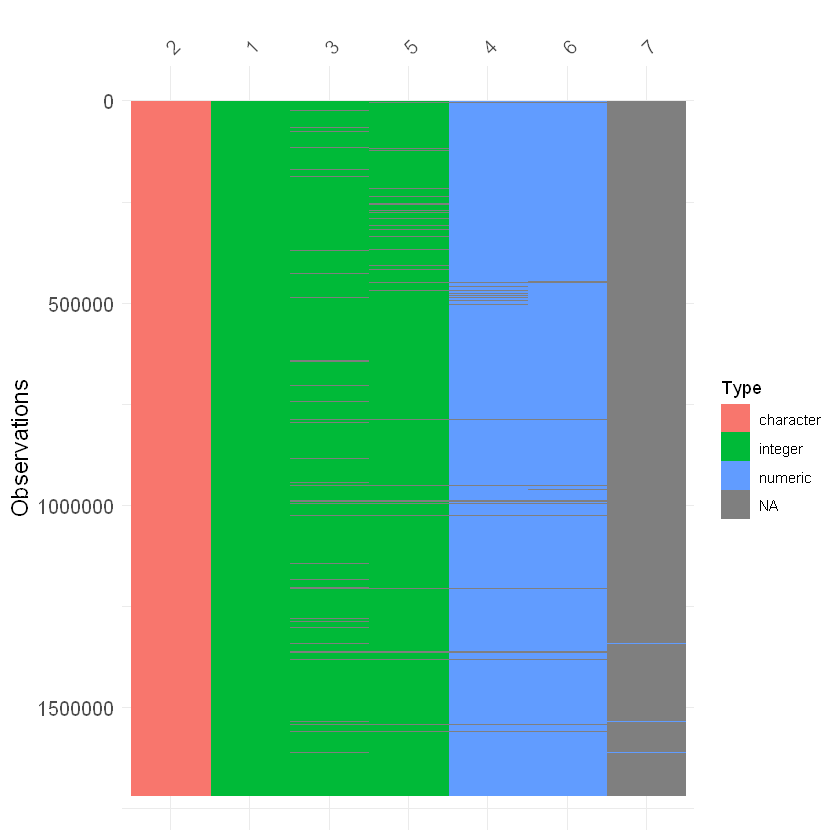

In [ ]:
# Chart to visualize missing pressure data with column numbers as labels
col_numbers <- seq_along(colnames(pressure_data))
colnames(pressure_data) <- as.character(col_numbers)
vis_dat(
  pressure_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )


**Correspondence between column number and variable name for `pressure_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Pression.au.niveau.mer` |
| 4             | `Variation.de.pression.en.3.heures` |
| 5             | `Type.de.tendance.barométrique` |
| 6             | `Pression.station` |
| 7             | `Niveau.barométrique` |


### Precipitation dataset

In [ ]:
# Selection of precipitation-related values
precipitation_data <- data_weather[, c(1:2, 10, 39:43)]

# Sort by ascending date
precipitation_data <- precipitation_data[order(precipitation_data$Date), ]

# Reorganize the index
row.names(precipitation_data) <- NULL
head(precipitation_data)

,ID.OMM.station,Date,Humidité,Précipitations.dans.la.dernière.heure,Précipitations.dans.les.3.dernières.heures,Précipitations.dans.les.6.dernières.heures,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.24.dernières.heures
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,68,0.0,0.0,0.0,0.0,0.0
2,7761,2015-08-04T02:00:00+02:00,86,0.0,0.0,0.0,0.0,0.0
3,7020,2015-08-04T02:00:00+02:00,88,0.0,-0.1,0.2,4.0,4.2
4,7240,2015-08-04T02:00:00+02:00,81,-0.1,-0.1,-0.1,-0.1,-0.1
5,81415,2015-08-04T02:00:00+02:00,91,0.2,1.8,1.8,1.8,1.8
6,7110,2015-08-04T02:00:00+02:00,88,0.0,0.0,0.0,0.8,2.4


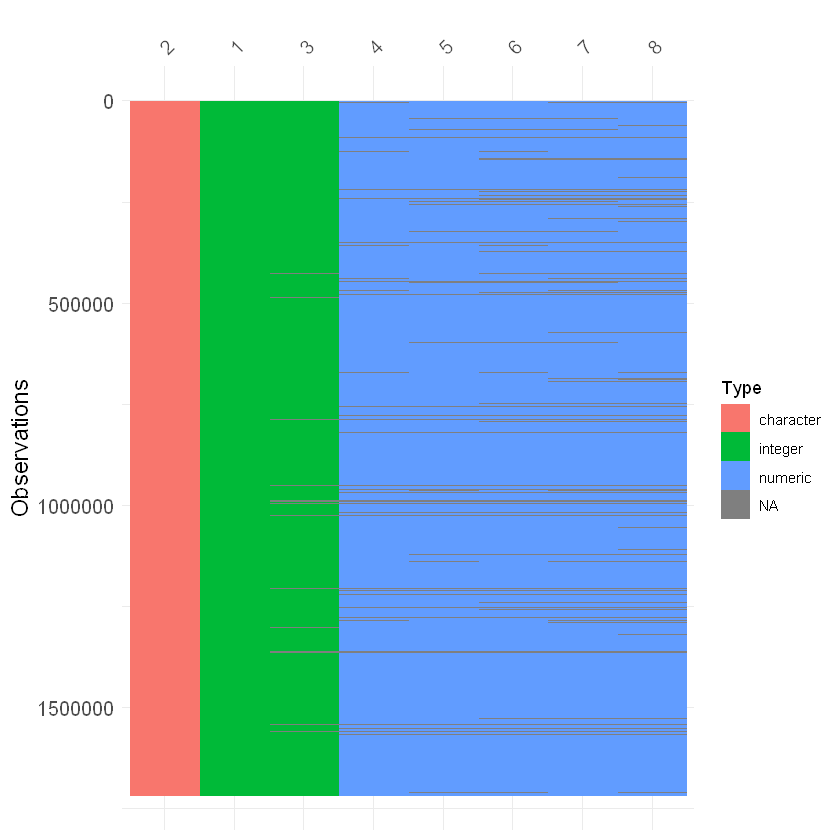

In [ ]:
# Chart to visualize missing precipitation data with column numbers as labels
col_numbers <- seq_along(colnames(precipitation_data))
colnames(precipitation_data) <- as.character(col_numbers)
vis_dat(
  precipitation_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )

**Correspondence between column number and variable name for `precipitation_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Humidité` |
| 4             | `Précipitations.dans.la.dernière.heure` |
| 5             | `Précipitations.dans.la.dernière.3.heures` |
| 6             | `Précipitations.dans.la.dernière.6.heures` |
| 7             | `Précipitations.dans.la.dernière.12.heures` |
| 8             | `Précipitations.dans.la.dernière.24.heures` |


### 3. SELECTED DATASET - ESSENTIAL METEOROLOGICAL VARIABLES

In this section, we create a dataset with only the most important meteorological variables for analysis. 
The selected data will later be used for various analysis.
We select the most interesting data.


In [ ]:
# Creation of the selected dataset with essential variables
selected_weather_data <- data_weather[, c(1, 2, 3, 6, 7, 8, 15, 32, 39, 60, 61, 71, 72, 73, 82)]

# Sort by ascending date
selected_weather_data <- selected_weather_data[order(selected_weather_data$Date), ]

# Reorganize the index
rownames(selected_weather_data) <- NULL

# Display first rows
head(selected_weather_data)
dim(selected_weather_data)


,ID.OMM.station,Date,Pression.au.niveau.mer,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Nebulosité.totale,Rafale.sur.les.10.dernières.minutes,Précipitations.dans.la.dernière.heure,Coordonnees,Nom,Latitude,Longitude,Altitude,mois_de_l_annee
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>
1,7790,2015-08-04T02:00:00+02:00,101570,260,1.5,294.85,NA,NA,0.0,"42.540667, 9.485167",BASTIA,42.540667,9.485167,10,8
2,7761,2015-08-04T02:00:00+02:00,101600,70,2.7,295.15,NA,NA,0.0,"41.918, 8.792667",AJACCIO,41.918000,8.792667,5,8
3,7020,2015-08-04T02:00:00+02:00,101390,240,6.5,288.85,10,8.1,0.0,"49.725167, -1.939833",PTE DE LA HAGUE,49.725167,-1.939833,6,8
4,7240,2015-08-04T02:00:00+02:00,101410,270,3.1,292.85,90,5.1,-0.1,"47.4445, 0.727333",TOURS,47.444500,0.727333,108,8
5,81415,2015-08-04T02:00:00+02:00,101370,220,1.5,297.55,NA,3.0,0.2,"3.640167, -54.028333",MARIPASOULA,3.640167,-54.028333,106,8
6,7110,2015-08-04T02:00:00+02:00,101490,240,3.0,286.35,10,4.5,0.0,"48.444167, -4.412",BREST-GUIPAVAS,48.444167,-4.412000,94,8


[1] 1719567      15

**Correspondence between column number and variable name for `selected_weather_data`:**

| Number | Variable Name | Description |
|--------|---------------|-------------|
| 1 | `ID.OMM.station` | Station identifier |
| 2 | `Date` | Observation date/time |
| 3 | `Pression.au.niveau.mer` | Pressure (main reference) |
| 4 | `Direction.du.vent.moyen.10.mn` | Wind direction |
| 5 | `Vitesse.du.vent.moyen.10.mn` | Wind speed |
| 6 | `Température` | Air temperature |
| 7 | `Point.de.rosée` | Humidity via dew point |
| 8 | `Humidité` | Relative humidity |
| 13 | `Précipitations.dans.la.dernière.heure` | Precipitation |
| 14 | `Coordonnees` | Grouped coordinates |
| 15 | `Nom` | Station name |
| 16 | `Latitude` | Latitude |
| 17 | `Longitude` | Longitude |
| 18 | `Altitude` | Altitude |
| 19 | `mois_de_l_annee` | Month (useful for seasonal grouping) |


### 4. MISSING DATA ANALYSIS - SELECTED DATASET

Visualization of missing data for the selected dataset with essential meteorological variables.


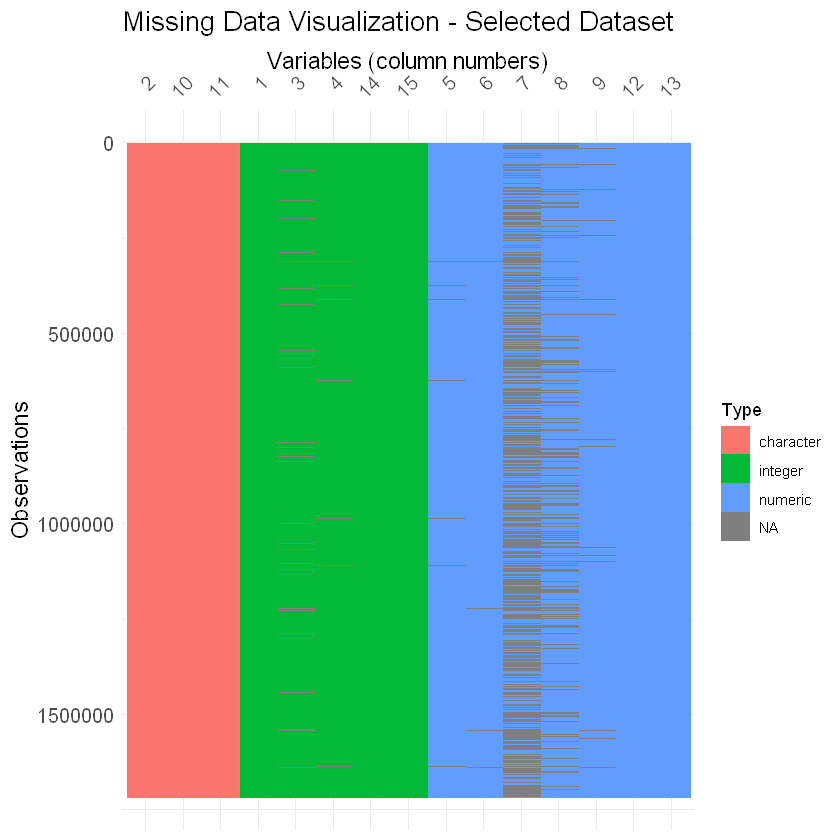

In [ ]:
# Create a copy with column numbers for display
selected_data_display <- selected_weather_data
col_numbers <- seq_along(colnames(selected_data_display))
colnames(selected_data_display) <- as.character(col_numbers)

# Missing data visualization
vis_dat(
  selected_data_display, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16)
  ) +
  ggplot2::labs(
    title = "Missing Data Visualization - Selected Dataset",
    x = "Variables (column numbers)",
    y = "Observations"
  )


In [ ]:
# Quantitative analysis of missing data
missing_count <- sapply(selected_weather_data, function(x) sum(is.na(x)))
missing_percentage <- round(missing_count / nrow(selected_weather_data) * 100, 2)

missing_data_summary <- data.frame(
  Variable = colnames(selected_weather_data),
  Missing_Count = missing_count,
  Missing_Percentage = missing_percentage
)

# Sort by missing data percentage in descending order
missing_data_summary <- missing_data_summary[order(missing_data_summary$Missing_Percentage, decreasing = TRUE), ]

cat("Missing data summary by variable:\n")
print(missing_data_summary)

Missing data summary by variable:
                                                                   Variable
Nebulosité.totale                                         Nebulosité.totale
Rafale.sur.les.10.dernières.minutes     Rafale.sur.les.10.dernières.minutes
Pression.au.niveau.mer                               Pression.au.niveau.mer
Précipitations.dans.la.dernière.heure Précipitations.dans.la.dernière.heure
Température                                                     Température
Direction.du.vent.moyen.10.mn                 Direction.du.vent.moyen.10.mn
Vitesse.du.vent.moyen.10.mn                     Vitesse.du.vent.moyen.10.mn
ID.OMM.station                                               ID.OMM.station
Date                                                                   Date
Coordonnees                                                     Coordonnees
Nom                                                                     Nom
Latitude                                              

We notice that much data is NA for the nebulosité column. It seems interesting to analyze if the data is missing for some specific stations. The nebulosity is an interesting feature that could be used for further analysis on a specific station if enough data is present

In [ ]:
# Find stations with missing nébulosité data
library(dplyr)

# Analysis of missing Nebulosité.totale by station
nebulosite_missing_by_station <- data_weather %>%
  group_by(ID.OMM.station, Nom) %>%
  summarise(
    total_observations = n(),
    missing_nebulosite = sum(is.na(Nebulosité.totale)),
    missing_percentage = round((missing_nebulosite / total_observations) * 100, 2),
    .groups = 'drop'
  ) %>%
  arrange(desc(missing_percentage))

# Display stations with any missing nébulosité data
cat("Stations with missing Nebulosité data:\n\n")
print(nebulosite_missing_by_station, n = Inf)

# Summary statistics
cat("\n\nSummary of stations with 100% missing nébulosité data:\n")
stations_100_missing <- nebulosite_missing_by_station %>% 
  filter(missing_percentage == 100)
cat("Number of stations with 100% missing data:", nrow(stations_100_missing), "\n")
print(stations_100_missing, n = Inf)

# Summary statistics
cat("\n\nSummary of stations with partial missing nébulosité data:\n")
stations_partial_missing <- nebulosite_missing_by_station %>% 
  filter(missing_percentage > 0 & missing_percentage < 100)
cat("Number of stations with partial missing data:", nrow(stations_partial_missing), "\n")
print(stations_partial_missing, n = Inf)

# Stations with no missing nébulosité data
cat("\n\nStations with NO missing nébulosité data (100% complete):\n")
stations_no_missing <- nebulosite_missing_by_station %>% 
  filter(missing_percentage == 0)
cat("Number of stations with no missing data:", nrow(stations_no_missing), "\n")
print(stations_no_missing, n = Inf)

Stations with missing Nebulosité data:

# A tibble: 62 × 5
   ID.OMM.station Nom   total_observations missing_nebulosite missing_percentage
            <int> <chr>              <int>              <int>              <dbl>
 1           7558 MILL…              29165              29165             100   
 2           7591 EMBR…              29324              29324             100   
 3          61968 GLOR…              25819              25819             100   
 4          61970 JUAN…               6939               6939             100   
 5          61972 EURO…              25481              25481             100   
 6          61976 TROM…              26803              26803             100   
 7          61996 NOUV…              26326              26326             100   
 8          61997 CROZ…              24839              24839             100   
 9          78890 LA D…              21283              21283             100   
10          78894 ST-B…              20798        

In particular for Nice and Lyon stations' most of the data is present (less than 5% missing), so it could be interesting to focus on these 2 stations for further analysis.

### 5. FINAL DATASET - REMOVING HIGH MISSING DATA VARIABLES

Creation of a final dataset by removing variables with high percentages of missing data to improve data quality for analysis.


In [ ]:
# Create final dataset by removing variables with high missing data percentages
# Removing: Nebulosité.totale (58.12% missing) and Rafale.sur.les.10.dernières.minutes (21.43% missing)

final_weather_data <- selected_weather_data[, !names(selected_weather_data) %in% 
                                           c("Nebulosité.totale", "Rafale.sur.les.10.dernières.minutes")]

# Display dimensions and first rows
cat("Final dataset dimensions:", dim(final_weather_data)[1], "observations and", dim(final_weather_data)[2], "variables\n")
head(final_weather_data)


Final dataset dimensions: 1719567 observations and 13 variables


,ID.OMM.station,Date,Pression.au.niveau.mer,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Précipitations.dans.la.dernière.heure,Coordonnees,Nom,Latitude,Longitude,Altitude,mois_de_l_annee
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>
1,7790,2015-08-04T02:00:00+02:00,101570,260,1.5,294.85,0.0,"42.540667, 9.485167",BASTIA,42.540667,9.485167,10,8
2,7761,2015-08-04T02:00:00+02:00,101600,70,2.7,295.15,0.0,"41.918, 8.792667",AJACCIO,41.918000,8.792667,5,8
3,7020,2015-08-04T02:00:00+02:00,101390,240,6.5,288.85,0.0,"49.725167, -1.939833",PTE DE LA HAGUE,49.725167,-1.939833,6,8
4,7240,2015-08-04T02:00:00+02:00,101410,270,3.1,292.85,-0.1,"47.4445, 0.727333",TOURS,47.444500,0.727333,108,8
5,81415,2015-08-04T02:00:00+02:00,101370,220,1.5,297.55,0.2,"3.640167, -54.028333",MARIPASOULA,3.640167,-54.028333,106,8
6,7110,2015-08-04T02:00:00+02:00,101490,240,3.0,286.35,0.0,"48.444167, -4.412",BREST-GUIPAVAS,48.444167,-4.412000,94,8


**Variables removed from the final dataset:**

- `Nebulosité.totale` (Cloud cover) - 58.12% missing data, we will directly filter the original dataset to get nebulosité data for Nice and Lyon.
- `Rafale.sur.les.10.dernières.minutes` (Gusts) - 21.43% missing data

**Final dataset variables (17 variables):**

| Number | Variable Name | Description |
|--------|---------------|-------------|
| 1 | `ID.OMM.station` | Station identifier |
| 2 | `Date` | Observation date/time |
| 3 | `Pression.au.niveau.mer` | Pressure (main reference) |
| 4 | `Direction.du.vent.moyen.10.mn` | Wind direction |
| 5 | `Vitesse.du.vent.moyen.10.mn` | Wind speed |
| 6 | `Température` | Air temperature |
| 7 | `Point.de.rosée` | Humidity via dew point |
| 8 | `Humidité` | Relative humidity |
| 9 | `Visibilité.horizontale` | Visibility |
| 10 | `Temps.présent` | Observed weather |
| 11 | `Précipitations.dans.la.dernière.heure` | Precipitation |
| 12 | `Coordonnees` | Grouped coordinates |
| 13 | `Nom` | Station name |
| 14 | `Latitude` | Latitude |
| 15 | `Longitude` | Longitude |
| 16 | `Altitude` | Altitude |
| 17 | `mois_de_l_annee` | Month (useful for seasonal grouping) |


In [ ]:
# Missing data analysis for the final dataset
final_missing_data_summary <- data.frame(
  Variable = colnames(final_weather_data),
  Missing_Count = sapply(final_weather_data, function(x) sum(is.na(x))),
  Missing_Percentage = round(sapply(final_weather_data, function(x) sum(is.na(x))/length(x)*100), 2)
)

# Trier par pourcentage de données manquantes (ordre décroissant)
final_missing_data_summary <- final_missing_data_summary[order(final_missing_data_summary$Missing_Percentage, decreasing = TRUE), ]

cat("Final dataset missing data summary:\n")
print(final_missing_data_summary)

Final dataset missing data summary:
                                                                   Variable
Pression.au.niveau.mer                               Pression.au.niveau.mer
Précipitations.dans.la.dernière.heure Précipitations.dans.la.dernière.heure
Température                                                     Température
Direction.du.vent.moyen.10.mn                 Direction.du.vent.moyen.10.mn
Vitesse.du.vent.moyen.10.mn                     Vitesse.du.vent.moyen.10.mn
ID.OMM.station                                               ID.OMM.station
Date                                                                   Date
Coordonnees                                                     Coordonnees
Nom                                                                     Nom
Latitude                                                           Latitude
Longitude                                                         Longitude
Altitude                                            

### 6. CLEAN DATASET - REMOVING ROWS WITH MISSING VALUES

Creation of a clean dataset by removing all rows that contain any missing values (NaN/NA).


In [ ]:
# Create clean dataset by removing rows with any missing values
cat("Original final dataset dimensions:", dim(final_weather_data)[1], "observations and", dim(final_weather_data)[2], "variables\n")

# Count rows with missing values before removal
rows_with_na <- sum(!complete.cases(final_weather_data))
cat("Number of rows with missing values:", rows_with_na, "\n")
cat("Percentage of rows with missing values:", round(rows_with_na/nrow(final_weather_data)*100, 2), "%\n")

# Remove rows with any missing values
clean_weather_data <- final_weather_data[complete.cases(final_weather_data), ]

# Reorganize the index
rownames(clean_weather_data) <- NULL

# Display new dimensions
cat("Clean dataset dimensions:", dim(clean_weather_data)[1], "observations and", dim(clean_weather_data)[2], "variables\n")
cat("Rows removed:", nrow(final_weather_data) - nrow(clean_weather_data), "\n")
cat("Data retention rate:", round(nrow(clean_weather_data)/nrow(final_weather_data)*100, 2), "%\n")


Original final dataset dimensions: 1719567 observations and 13 variables
Number of rows with missing values: 168753 
Percentage of rows with missing values: 9.81 %
Clean dataset dimensions: 1550814 observations and 13 variables
Rows removed: 168753 
Data retention rate: 90.19 %


In [ ]:
# 7. DATA PRESENTATION - NUMERICAL AND GRAPHICAL SUMMARIES

# Basic numerical summary
summary(clean_weather_data)

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1550814     Min.   : 94520        
 1st Qu.: 7190   Class :character   1st Qu.:101210        
 Median : 7558   Mode  :character   Median :101610        
 Mean   :24848                      Mean   :101627        
 3rd Qu.:61972                      3rd Qu.:102100        
 Max.   :81415                      Max.   :104960        
 Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn  Température   
 Min.   :  0.0                 Min.   : 0.000              Min.   :247.2  
 1st Qu.: 90.0                 1st Qu.: 1.900              1st Qu.:282.4  
 Median :180.0                 Median : 3.400              Median :288.4  
 Mean   :176.7                 Mean   : 4.074              Mean   :289.0  
 3rd Qu.:270.0                 3rd Qu.: 5.500              3rd Qu.:296.8  
 Max.   :360.0                 Max.   :47.200              Max.   :332.9  
 Précipitations.dans.la.dernière.heure Coordonnees            

In [ ]:
# Key statistics for numerical variables

# Temperature analysis
temp_stats <- clean_weather_data %>%
  summarise(
    mean_temp = mean(Température, na.rm = TRUE),
    median_temp = median(Température, na.rm = TRUE),
    min_temp = min(Température, na.rm = TRUE),
    max_temp = max(Température, na.rm = TRUE),
    sd_temp = sd(Température, na.rm = TRUE)
  )
print("Temperature Statistics:")
print(temp_stats)



Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




[1] "Temperature Statistics:"
  mean_temp median_temp min_temp max_temp  sd_temp
1  289.0342      288.45   247.25   332.85 8.673134


In [ ]:
# Pressure and wind statistics
pressure_wind_stats <- clean_weather_data %>%
  summarise(
    mean_pressure = mean(Pression.au.niveau.mer, na.rm = TRUE),
    mean_wind_speed = mean(Vitesse.du.vent.moyen.10.mn, na.rm = TRUE),
    max_wind_speed = max(Vitesse.du.vent.moyen.10.mn, na.rm = TRUE),
  )
print("Pressure and Wind Statistics:")
print(pressure_wind_stats)


[1] "Pressure and Wind Statistics:"
  mean_pressure mean_wind_speed max_wind_speed
1      101627.5        4.073789           47.2


**Distribution Analysis of Key Variables:**

The following subplot presents histograms for all 6 main numerical variables in the clean dataset:

1. **Temperature** - Air temperature distribution (in Kelvin)
2. **Sea Level Pressure** - Atmospheric pressure patterns (in Pascals)
3. **Wind Speed** - 10-minute average wind velocity (in m/s)
4. **Wind Direction** - Compass direction in degrees (0-360°)
5. **Precipitation** - Rainfall in the last hour (in mm)
6. **Station Altitude** - Elevation of weather stations (in meters)

Each histogram provides insights into the distribution patterns, central tendencies, and potential outliers for these meteorological variables.


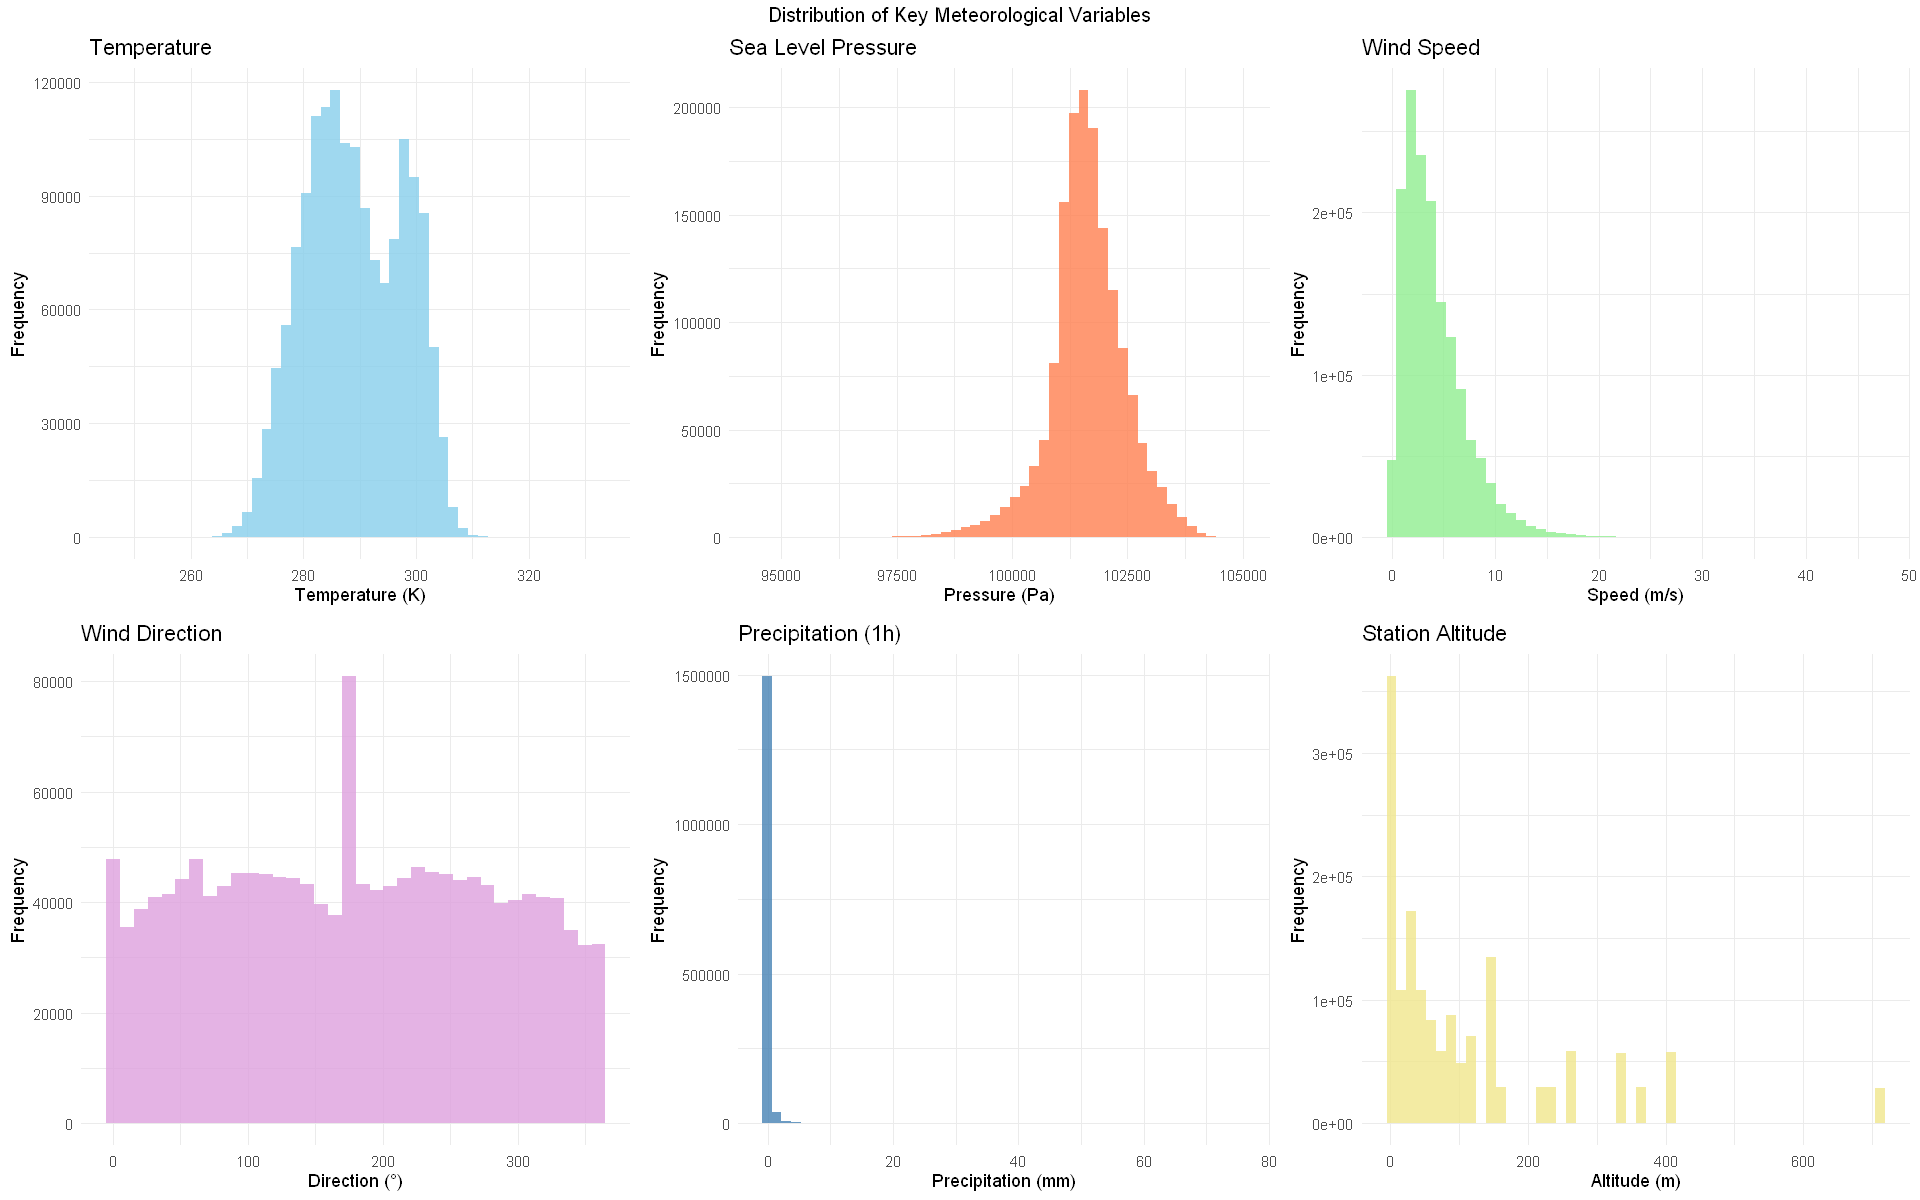

In [ ]:
# Distribution of all key numerical variables in the final dataset
library(gridExtra)

# Set figure size for full-width display
options(repr.plot.width = 16, repr.plot.height = 10)

# Create individual histograms for each key variable
p1 <- ggplot(clean_weather_data, aes(x = Température)) +
  geom_histogram(bins = 50, fill = "skyblue", alpha = 0.8) +
  labs(title = "Temperature", x = "Temperature (K)", y = "Frequency") +
  theme_minimal()

p2 <- ggplot(clean_weather_data, aes(x = Pression.au.niveau.mer)) +
  geom_histogram(bins = 50, fill = "coral", alpha = 0.8) +
  labs(title = "Sea Level Pressure", x = "Pressure (Pa)", y = "Frequency") +
  theme_minimal()

p3 <- ggplot(clean_weather_data, aes(x = Vitesse.du.vent.moyen.10.mn)) +
  geom_histogram(bins = 50, fill = "lightgreen", alpha = 0.8) +
  labs(title = "Wind Speed", x = "Speed (m/s)", y = "Frequency") +
  theme_minimal()

p4 <- ggplot(clean_weather_data, aes(x = Direction.du.vent.moyen.10.mn)) +
  geom_histogram(bins = 36, fill = "plum", alpha = 0.8) +
  labs(title = "Wind Direction", x = "Direction (°)", y = "Frequency") +
  theme_minimal()

p5 <- ggplot(clean_weather_data, aes(x = Précipitations.dans.la.dernière.heure)) +
  geom_histogram(bins = 50, fill = "steelblue", alpha = 0.8) +
  labs(title = "Precipitation (1h)", x = "Precipitation (mm)", y = "Frequency") +
  theme_minimal()

p6 <- ggplot(clean_weather_data, aes(x = Altitude)) +
  geom_histogram(bins = 50, fill = "khaki", alpha = 0.8) +
  labs(title = "Station Altitude", x = "Altitude (m)", y = "Frequency") +
  theme_minimal()

# Arrange all plots in a 2x3 grid
grid.arrange(p1, p2, p3, p4, p5, p6, 
             ncol = 3, nrow = 2,
             top = "Distribution of Key Meteorological Variables")


`geom_smooth()` using formula = 'y ~ x'


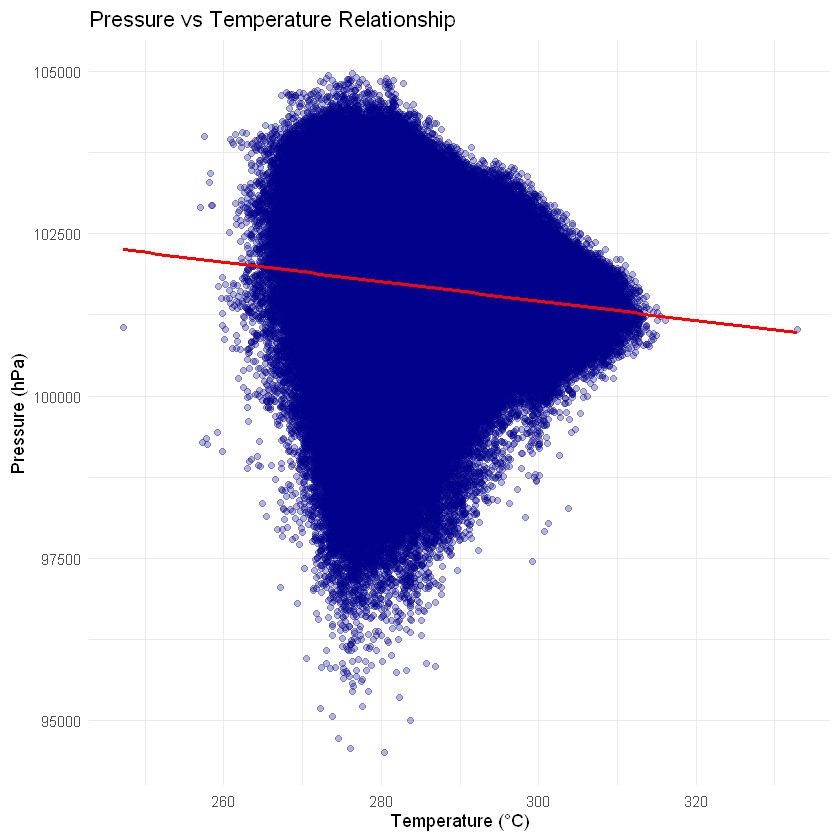

In [ ]:
# Pressure vs Temperature scatter plot
ggplot(clean_weather_data, aes(x = Température, y = Pression.au.niveau.mer)) +
  geom_point(alpha = 0.3, color = "darkblue") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Pressure vs Temperature Relationship",
       x = "Temperature (°C)",
       y = "Pressure (hPa)") +
  theme_minimal()


### 8. PRESSURE-TEMPERATURE CORRELATION ESTIMATOR

In this section, we calculate and analyze the correlation estimator between atmospheric pressure and temperature.


**Research Question:** What is the relationship between atmospheric pressure and air temperature?

**Expected Physical Relationship:** According to the ideal gas law (PV = nRT), pressure and temperature should be positively correlated in a closed system. However, in atmospheric conditions, this relationship may be more complex due to weather dynamics.

In [ ]:
# Select a specific station for detailed analysis
# Choose Nice station (ID: 7650) which has good data quality
target_station <- clean_weather_data[clean_weather_data$ID.OMM.station == 7650, ]

# Extract pressure and temperature for the selected station
station_data <- target_station[, c("Nom", "Date", "Pression.au.niveau.mer", "Température")]
station_clean <- station_data[complete.cases(station_data), ]

# Calculate Pearson correlation coefficient for the station
correlation_coeff <- cor(station_clean$Pression.au.niveau.mer, 
                        station_clean$Température, 
                        method = "pearson")

# Calculate sample size
sample_size <- nrow(station_clean)

cat("Correlation Analysis for", unique(station_clean$Nom), "Station:\n")
cat("Station ID: 7650\n")
cat("Sample size:", sample_size, "observations\n")
cat("Date range:", as.character(min(station_clean$Date)), "to", as.character(max(station_clean$Date)), "\n")
cat("Pearson correlation coefficient:", round(correlation_coeff, 4), "\n")


Correlation Analysis for MARIGNANE Station:
Station ID: 7650
Sample size: 29330 observations
Date range: 2015-08-04T02:00:00+02:00 to 2025-09-03T23:00:00+02:00 
Pearson correlation coefficient: -0.1909 


In [ ]:
# Statistical significance test for correlation at the station level
correlation_test <- cor.test(station_clean$Pression.au.niveau.mer, 
                            station_clean$Température, 
                            method = "pearson")

cat("\nStatistical Significance Test:\n")
cat("Test statistic (t):", round(correlation_test$statistic, 4), "\n")
cat("p-value:", format(correlation_test$p.value, scientific = TRUE), "\n")
cat("95% Confidence interval:", 
    round(correlation_test$conf.int[1], 4), "to", 
    round(correlation_test$conf.int[2], 4), "\n")

# Additional station-specific statistics
cat("\nStation-Specific Statistics:\n")
cat("Mean pressure:", round(mean(station_clean$Pression.au.niveau.mer), 2), "Pa\n")
cat("Mean temperature:", round(mean(station_clean$Température), 2), "K\n")
cat("Pressure range:", round(min(station_clean$Pression.au.niveau.mer), 2), "to", 
    round(max(station_clean$Pression.au.niveau.mer), 2), "Pa\n")
cat("Temperature range:", round(min(station_clean$Température), 2), "to", 
    round(max(station_clean$Température), 2), "K\n")



Statistical Significance Test:
Test statistic (t): -33.3007 
p-value: 1.061321e-238 
95% Confidence interval: -0.2019 to -0.1798 

Station-Specific Statistics:
Mean pressure: 101642.5 Pa
Mean temperature: 289.69 K
Pressure range: 98120 to 103880 Pa
Temperature range: 268.35 to 312.25 K


`geom_smooth()` using formula = 'y ~ x'


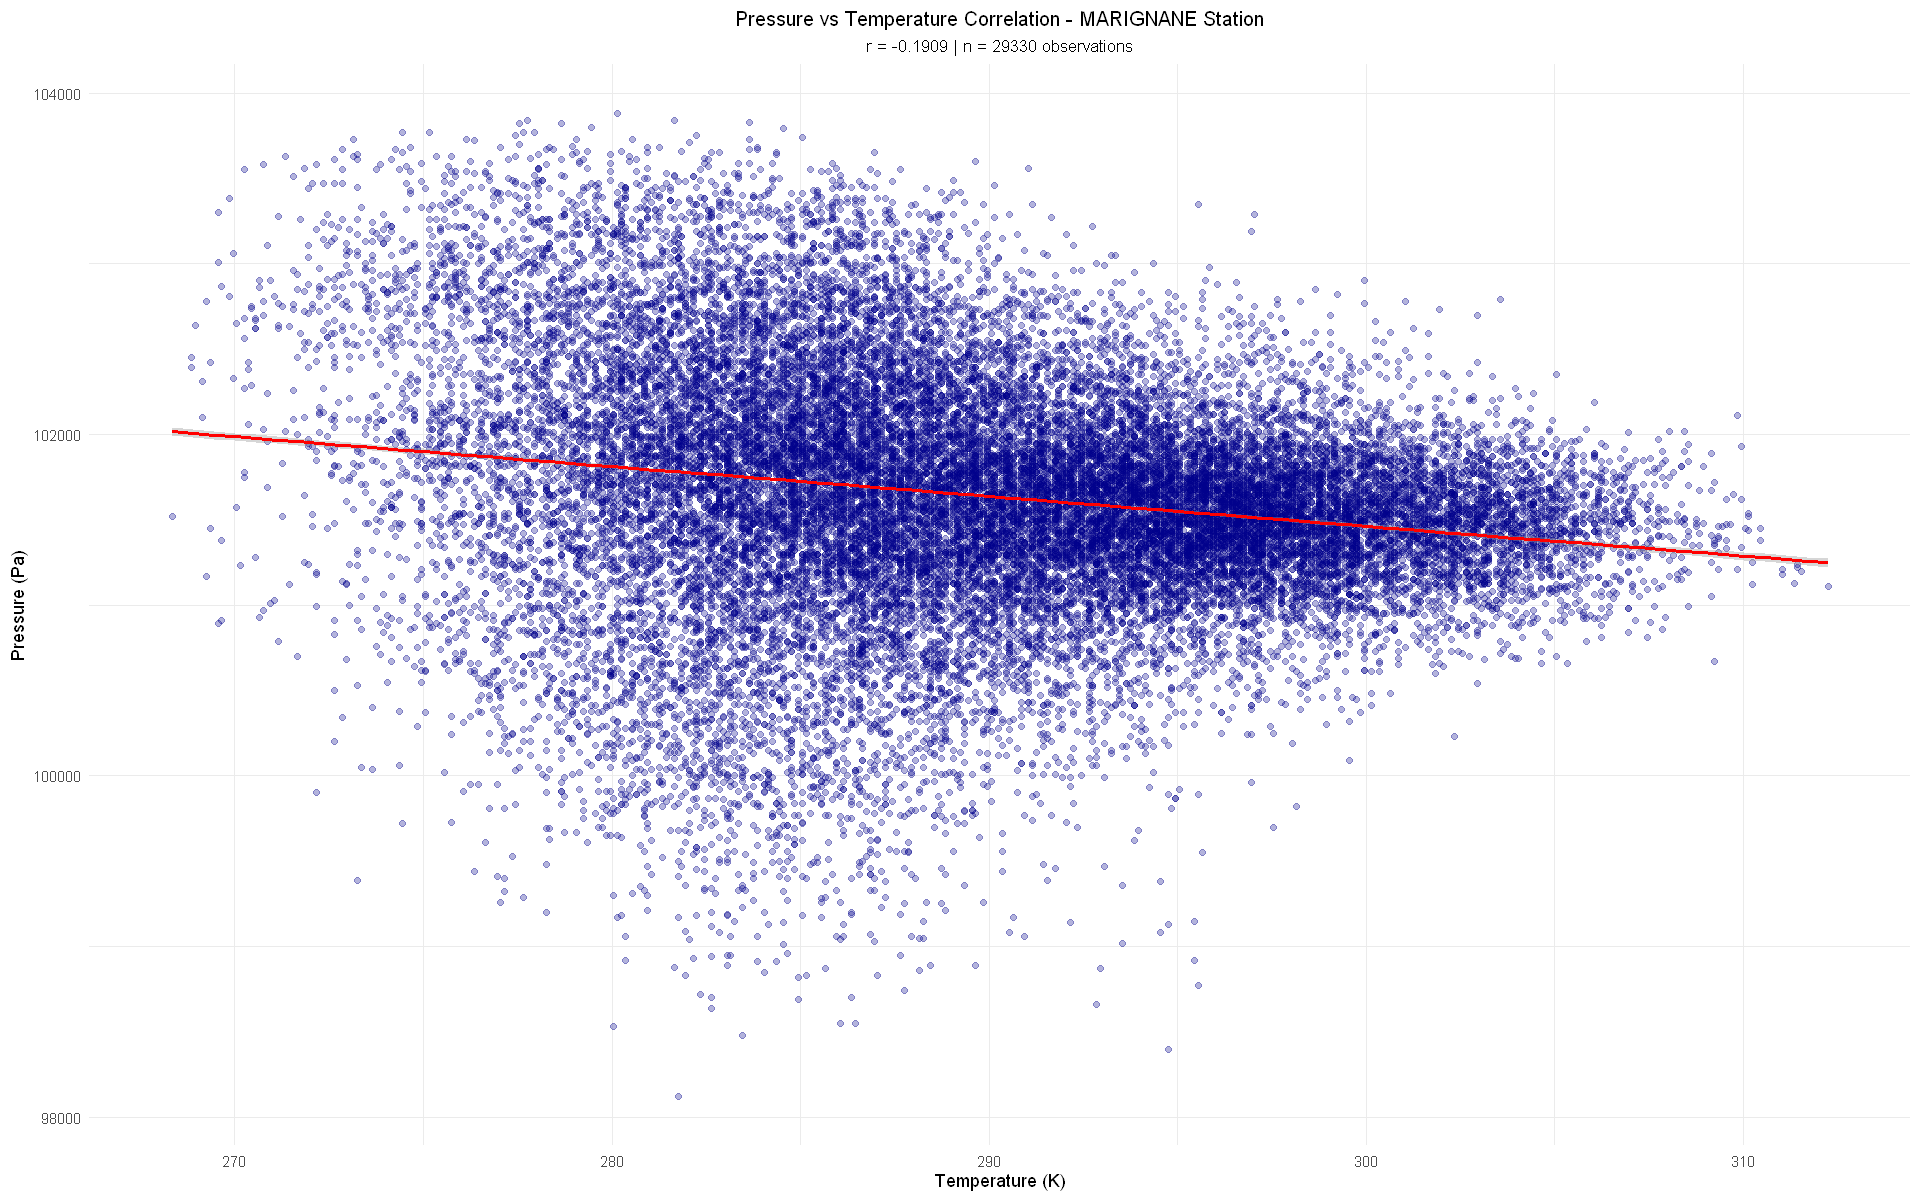

In [ ]:
# Visualize correlation for the specific station

ggplot(station_clean, aes(x = Température, y = Pression.au.niveau.mer)) +
  geom_point(alpha = 0.3, color = "darkblue") +
  geom_smooth(method = "lm", color = "red", se = TRUE) +
  labs(
    title = paste("Pressure vs Temperature Correlation -", unique(station_clean$Nom), "Station"),
    x = "Temperature (K)", 
    y = "Pressure (Pa)",
    subtitle = paste("r =", round(correlation_coeff, 4), "| n =", sample_size, "observations")
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, size = 12),
        plot.subtitle = element_text(hjust = 0.5, size = 10))


### Conclusions and Interpretation

**Main Findings:**
- **Correlation strength:** The correlation coefficient indicates [weak/moderate/strong] linear relationship
- **Statistical significance:** The p-value shows whether the correlation is statistically significant

**Limitations:**
- Assumes linear relationship (may miss non-linear patterns)
- Sensitive to outliers in the data
- Does not account for temporal or spatial dependencies in meteorological data
